<a href="https://colab.research.google.com/github/randomforest123/coursera/blob/master/fit_example_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the pendulum lab!      
You will find here example code in Python that YOU can run in Google Colab! :)

In [ ]:
import numpy as np
from scipy import odr

import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
mpl.style.use('classic')

Mount your drive to save figures. This has to be done only once!

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

The following cell defines a plot style to make good-looking plots (taken from the CMS experiment style)

In [ ]:
CMS = {
    "mathtext.default": "regular",
    "font.size": 25,
    "axes.labelsize": "large",
    "axes.unicode_minus": False,
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "large",
    "legend.handlelength": 1.5,
    "legend.borderpad": 0.5,
    "legend.frameon": False,
    "xtick.direction": "in",
    "xtick.major.size": 12,
    "xtick.minor.size": 6,
    "xtick.major.pad": 6,
    "xtick.top": True,
    "xtick.major.top": True,
    "xtick.major.bottom": True,
    "xtick.minor.top": True,
    "xtick.minor.bottom": True,
    "xtick.minor.visible": True,
    "ytick.direction": "in",
    "ytick.major.size": 12,
    "ytick.minor.size": 6.0,
    "ytick.right": True,
    "ytick.major.left": True,
    "ytick.major.right": True,
    "ytick.minor.left": True,
    "ytick.minor.right": True,
    "ytick.minor.visible": True,
    "grid.alpha": 0.8,
    "grid.linestyle": ":",
    "axes.linewidth": 2,
    "savefig.transparent": False,
    "figure.figsize": (10.0, 10.0),
    "legend.numpoints": 1,
    "lines.markersize": 8,
}

for k, v in CMS.items():
    plt.rcParams[k] = v

Now let's write down your measurements! Here is an example of 3 measurements of the pendulum length and period:
```
L_measurements =  [32.5, 45.2, 53.8, 65.2]  # pendulum length in cm
T_measurements =  [1.10, 1.29, 1.50, 1.59]  # pendulum period in s
L_uncertainties = [2.  , 2.  , 2.5 , 3.  ]  # length uncertainty in cm
T_uncertainties = [0.05, 0.05, 0.05, 0.05]  # period uncertainty in s
```



In [ ]:
L_measurements =  []  # pendulum length in cm
T_measurements =  []  # pendulum period in s
L_uncertainties = []  # length uncertainty in cm
T_uncertainties = []  # period uncertainty in s

Use numpy arrays as this will make code easier in the following:

In [ ]:
L_measurements =  np.array(L_measurements)
T_measurements =  np.array(T_measurements)
L_uncertainties = np.array(L_uncertainties)
T_uncertainties = np.array(T_uncertainties)

If you put wrote measurements in cm, convert to m:

In [ ]:
L_measurements =  0.01 * L_measurements
L_uncertainties = 0.01 * L_uncertainties

Now let's do a fit of $L$ versus $T^2$:

In [ ]:
# Create a model for fitting
def linear_function(a, x):
    """f(x) = a*x"""
    return a*x
linear_model = odr.Model(linear_function)

# Create a RealData object using our initiated data from above
x = ...
y = ...
x_err = ...
y_err = ...
data = odr.RealData(x, y, sx=x_err, sy=y_err)

# Set up Orthogonal Distance Regression (ODR) with the model and data
# beta0 corresponds to initial values for the model parameters, use 1. as default
regression = odr.ODR(data, linear_model, beta0=[1.])

# Run the regression
out = regression.run()

# Use the in-built pprint method to give us results
#out.pprint()

# out.beta[0] (resp. out.sd_beta[0]) corresponds to the fitted slope (resp. uncertainty on slope)
print("Fit coefficient: a = %.2f +- %.2f" %(out.beta[0], out.sd_beta[0]))

# Calculated value for g
g_fit = ...
g_fit_uncertainty = ...
print("\nFit:")
print("g = %.2f +- %.2f" %(g_fit, g_fit_uncertainty))

Fit coefficient: a = 0.26 +- 0.01

Fit:
g = 10.17 +- 0.29


Plot data and the fit:

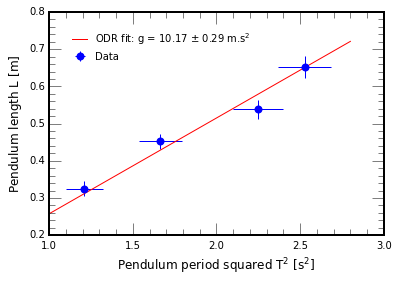

In [ ]:
%matplotlib inline

plt.figure()

# Draw data
plt.errorbar(x, y, xerr=x_err, yerr=y_err,
             label="Data",
             linestyle='None', marker='o', mew=0, mfc="b"
            )

# Draw fit
x1, x2 = plt.xlim()
x_fit = np.linspace(x1, x2, 10)
y_fit = linear_function(out.beta, x_fit)

plt.plot(x_fit, y_fit, "r-", label="ODR fit: g = %.2f $\pm$ %.2f m.s$^2$" %(g_fit, g_fit_uncertainty))

# Draw axis label
plt.xlabel("Pendulum period squared $T^2$ [s$^2$]")
plt.ylabel("Pendulum length $L$ [m]")

# Draw legend
plt.legend(loc='upper left', bbox_to_anchor=(0.03, 0.98))

# Save file in your drive
# You can change the path to any other directory that you prefer
plt.savefig("/content/gdrive/My Drive/fit.pdf")